In [448]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [746]:
df=pd.read_csv('car_insurance_claim.csv')

In [747]:
df.shape

(10302, 27)

In [748]:
df.head(1)

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban


In [749]:
x=df.drop('CLM_AMT',axis=1)
y=df['CLM_AMT']

In [750]:
xx_train, xx_test, yy_train, yy_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [751]:
x_train=xx_train.copy()
x_test=xx_test.copy()
y_train=yy_train.copy()
y_test=yy_test.copy()

In [752]:
x_train.shape

(8241, 26)

In [753]:
x_train.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             4
HOMEKIDS        0
YOJ           442
INCOME        452
PARENT1         0
HOME_VAL      442
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    535
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CAR_AGE       512
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [754]:
x_train.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,8.241000e+03,8241.000000,8237.000000,8241.000000,7799.000000,8241.000000,8241.000000,8241.000000,8241.000000,7729.000000,8241.000000
mean,4.975608e+08,0.169033,44.852373,0.715326,10.480831,33.524694,5.307123,0.800995,1.697610,8.291629,0.265866
std,2.860446e+08,0.506456,8.663047,1.117500,4.122031,15.908580,4.071266,1.155592,2.158086,5.720417,0.441820
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.477892e+08,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.995844e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.412224e+08,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,142.000000,22.000000,5.000000,13.000000,28.000000,1.000000


In [755]:
x_train.dtypes

ID              int64
KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

In [756]:
x_train['YOJ'].unique()

array([14.,  5., nan,  6., 15.,  8.,  0.,  9.,  7., 12., 10., 11., 16.,
       13., 17., 18.,  1.,  3.,  4.,  2., 19., 23.])

In [757]:
x_train['YOJ'].fillna(x_train['YOJ'].median(),inplace=True)

In [759]:
x_train[x_train['AGE'].isnull()].index

Index([4554, 1317, 4365, 1651], dtype='int64')

In [760]:
x_train.dropna(subset=['AGE'],inplace=True)

In [761]:
lst1=[float(i.replace('$','').replace(',','')) for i in x_train['INCOME'] if i is not np.NaN]

In [762]:
x_train['INCOME'].fillna(str(pd.Series(lst1).median()),inplace=True)

In [763]:
lst2=[float(i.replace('$','').replace(',','')) for i in x_train['HOME_VAL'] if i is not np.NaN]

In [764]:
x_train['HOME_VAL'].fillna(str(pd.Series(lst2).median()),inplace=True)

In [765]:
x_train['OCCUPATION'].fillna('Unknown',inplace=True)

In [766]:
x_train['CAR_AGE'].fillna(x_train['CAR_AGE'].median(),inplace=True)

In [767]:
x_train.isna().sum()

ID            0
KIDSDRIV      0
BIRTH         0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

In [768]:
x_train.dtypes

ID              int64
KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

In [769]:
months=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
d={'JAN':'01','FEB':'02','MAR':'03','APR':'04','MAY':'05','JUN':'06','JUL':'07','AUG':'08','SEP':'09','OCT':'10','NOV':'11','DEC':'12'}
bdate=[i.replace(m,d[m]) for i in x_train['BIRTH'] for m in months if m in i]

In [770]:
BIRTH_DATE=pd.DataFrame(bdate,columns=['BIRTH_NEW'])

In [771]:
BIRTH_DATE.head()

,BIRTH_NEW
0,160945
1,170746
2,250249
3,170960
4,100333


In [772]:
x_train.reset_index(inplace=True)

In [773]:
x_train=pd.concat([x_train,BIRTH_DATE],axis=1)

In [774]:
x_train.shape

(8237, 28)

In [775]:
x_train['BIRTH_NEW']=x_train['BIRTH_NEW'].astype('int')

In [776]:
lst_income=[i.replace('$','').replace(',','') for i in x_train['INCOME']]

In [777]:
x_train=pd.concat([x_train,pd.DataFrame(lst_income,columns=['INCOME_NEW'])],axis=1)

In [778]:
x_train['INCOME_NEW']=x_train['INCOME_NEW'].astype('float')

In [779]:
x_train['PARENT1'].value_counts()

PARENT1
No     7172
Yes    1065
Name: count, dtype: int64

In [780]:
x_train['PARENT1']=x_train['PARENT1'].map({'No':0,'Yes':1})

In [781]:
lst_HOME_VAL=[i.replace('$','').replace(',','') for i in x_train['HOME_VAL']]
x_train=pd.concat([x_train,pd.DataFrame(lst_HOME_VAL,columns=['HOME_VAL_NEW'])],axis=1)

In [782]:
x_train['HOME_VAL_NEW']=x_train['HOME_VAL_NEW'].astype('float')

In [783]:
x_train['MSTATUS'].value_counts()

MSTATUS
Yes     4963
z_No    3274
Name: count, dtype: int64

In [784]:
x_train['MSTATUS']=x_train['MSTATUS'].map({'z_No':0,'Yes':1})

In [785]:
x_train['GENDER'].value_counts()

GENDER
z_F    4439
M      3798
Name: count, dtype: int64

In [786]:
x_train['GENDER']=x_train['GENDER'].map({'z_F':0,'M':1})

In [787]:
x_train['EDUCATION'].value_counts()

EDUCATION
z_High School    2371
Bachelors        2246
Masters          1657
<High School     1202
PhD               761
Name: count, dtype: int64

In [788]:
x_train['EDUCATION']=x_train['EDUCATION'].map({'z_High School':0,'Bachelors':1,'Masters':2,'<High School':3,'PhD':4})

In [789]:
x_train['OCCUPATION'].value_counts()

OCCUPATION
z_Blue Collar    1860
Clerical         1257
Professional     1107
Manager          1000
Lawyer            816
Student           729
Home Maker        670
Unknown           535
Doctor            263
Name: count, dtype: int64

In [790]:
x_train['OCCUPATION']=x_train['OCCUPATION'].map({'z_Blue Collar':0,'Clerical':1,'Professional':2,'Manager':3,'Lawyer':4,'Student':5,
                                                 'Home Maker':6,'Unknown':7,'Doctor':8})

In [791]:
x_train['CAR_USE']=x_train['CAR_USE'].map({'Private':0,'Commercial':1})

In [792]:
lst_BLUEBOOK=[i.replace('$','').replace(',','') for i in x_train['BLUEBOOK']]
x_train=pd.concat([x_train,pd.DataFrame(lst_BLUEBOOK,columns=['BLUEBOOK_NEW'])],axis=1)

In [793]:
x_train['BLUEBOOK_NEW']=x_train['BLUEBOOK_NEW'].astype('float')

In [794]:
x_train['CAR_TYPE']=x_train['CAR_TYPE'].map({'z_SUV':0,'Minivan':1,'Pickup':2,'Sports Car':3,'Van':4,'Panel Truck':5})

In [795]:
lst_OLDCLAIM=[i.replace('$','').replace(',','') for i in x_train['OLDCLAIM']]
x_train=pd.concat([x_train,pd.DataFrame(lst_OLDCLAIM,columns=['OLDCLAIM_NEW'])],axis=1)
x_train['OLDCLAIM_NEW']=x_train['OLDCLAIM_NEW'].astype('float')

In [796]:
x_train['REVOKED'].value_counts()

REVOKED
No     7228
Yes    1009
Name: count, dtype: int64

In [797]:
x_train['REVOKED']=x_train['REVOKED'].map({'No':0,'Yes':1})

In [798]:
x_train['URBANICITY'].value_counts()

URBANICITY
Highly Urban/ Urban      6571
z_Highly Rural/ Rural    1666
Name: count, dtype: int64

In [799]:
x_train['URBANICITY']=x_train['URBANICITY'].map({'Highly Urban/ Urban':0,'z_Highly Rural/ Rural':1})

In [800]:
x_train.drop(['index','ID','RED_CAR','BIRTH','HOME_VAL','BLUEBOOK','OLDCLAIM','INCOME'],axis=1,inplace=True)

In [801]:
x_train.dtypes

KIDSDRIV          int64
AGE             float64
HOMEKIDS          int64
YOJ             float64
PARENT1           int64
MSTATUS           int64
GENDER            int64
EDUCATION         int64
OCCUPATION        int64
TRAVTIME          int64
CAR_USE           int64
TIF               int64
CAR_TYPE          int64
CLM_FREQ          int64
REVOKED           int64
MVR_PTS           int64
CAR_AGE         float64
CLAIM_FLAG        int64
URBANICITY        int64
BIRTH_NEW         int32
INCOME_NEW      float64
HOME_VAL_NEW    float64
BLUEBOOK_NEW    float64
OLDCLAIM_NEW    float64
dtype: object

In [802]:
x_train.shape

(8237, 24)

In [803]:
x_train.head(1)

,KIDSDRIV,AGE,HOMEKIDS,YOJ,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,...,REVOKED,MVR_PTS,CAR_AGE,CLAIM_FLAG,URBANICITY,BIRTH_NEW,INCOME_NEW,HOME_VAL_NEW,BLUEBOOK_NEW,OLDCLAIM_NEW
0,0,54.0,0,14.0,0,1,0,2,4,33,...,0,1,20.0,0,0,160945,100816.0,281563.0,21680.0,0.0


In [804]:
import matplotlib.pyplot as plt
import seaborn as sns

In [805]:
def viz(cl):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(x=x_train[cl])
    plt.subplot(1,3,2)
    sns.histplot(x=x_train[cl],kde=True)
    plt.subplot(1,3,3)
    sns.violinplot(x=x_train[cl])
    plt.show()


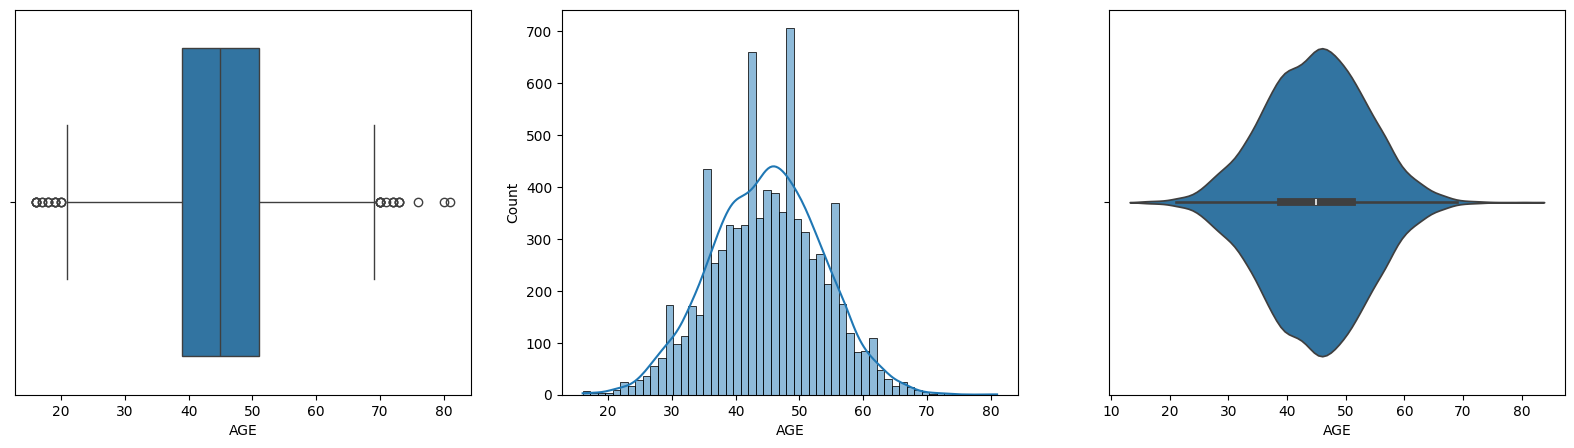

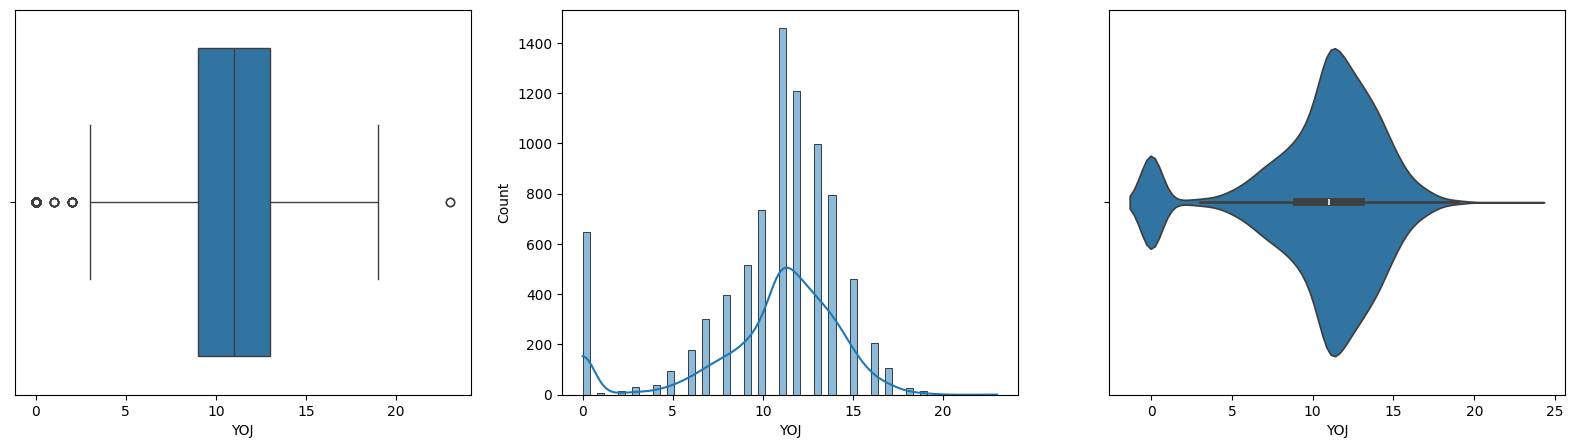

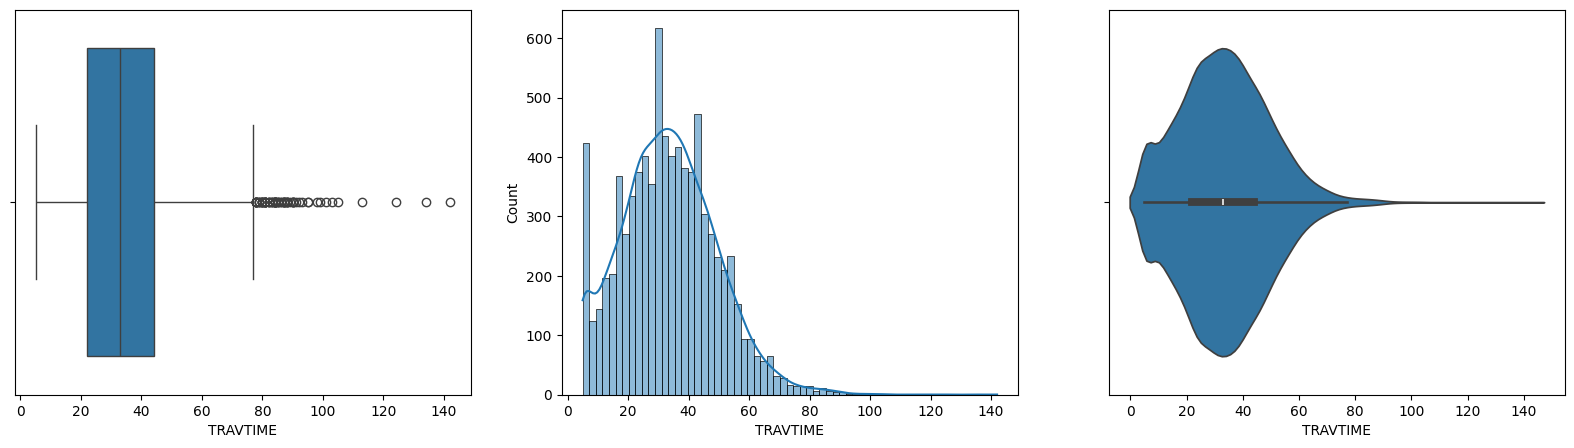

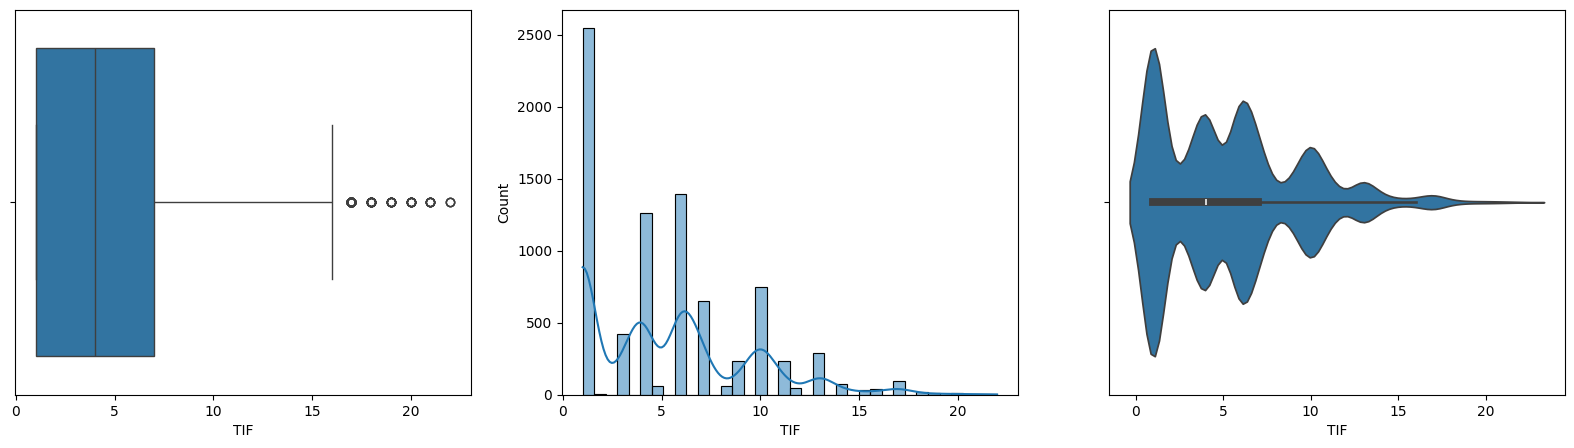

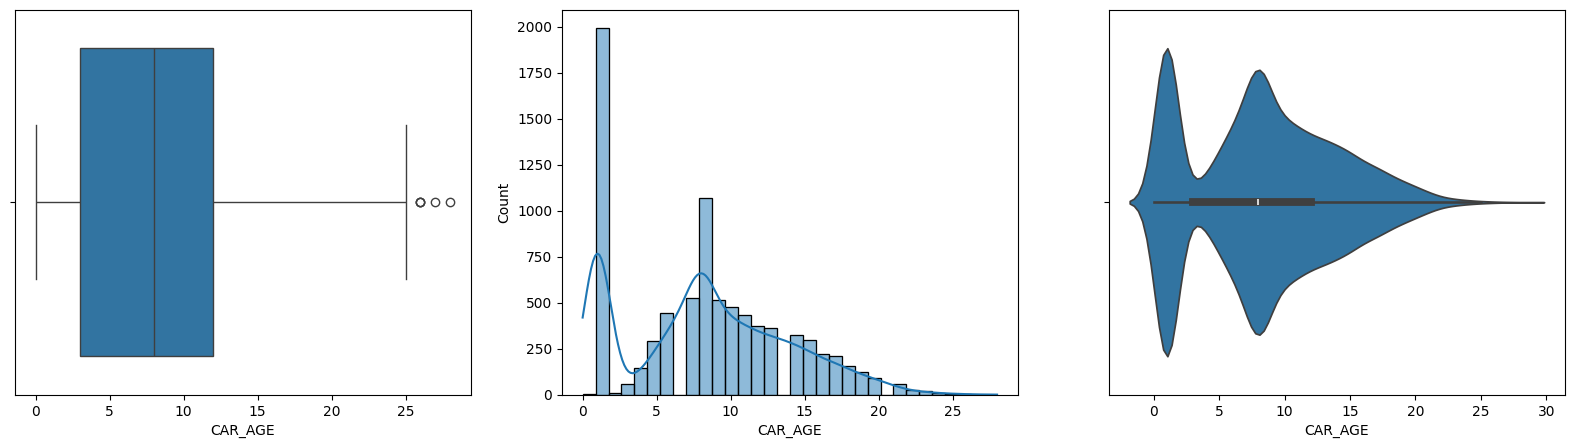

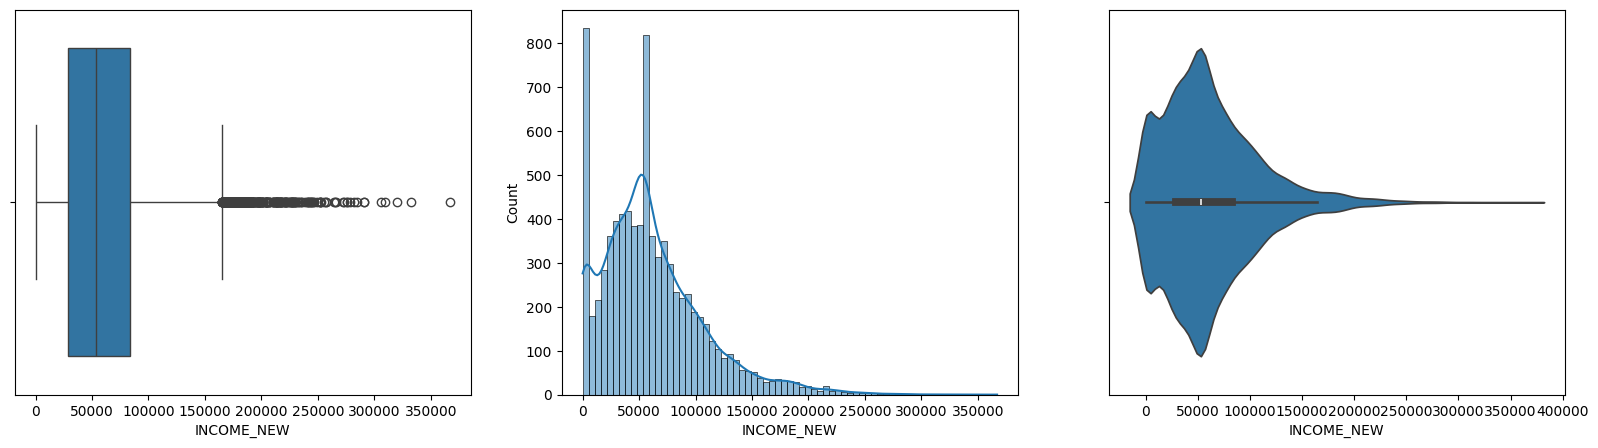

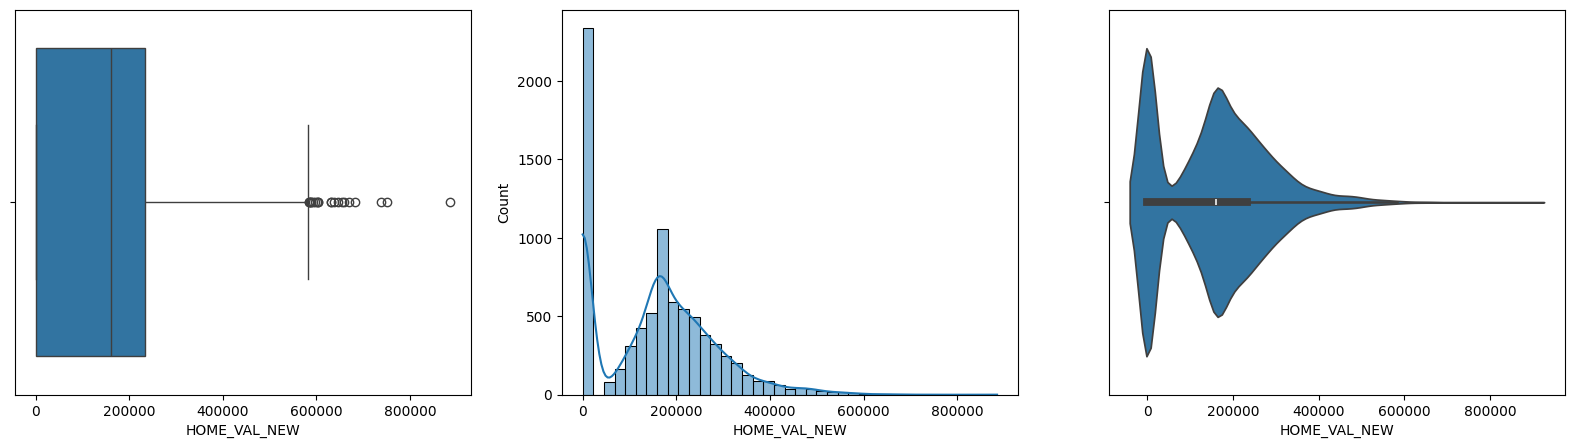

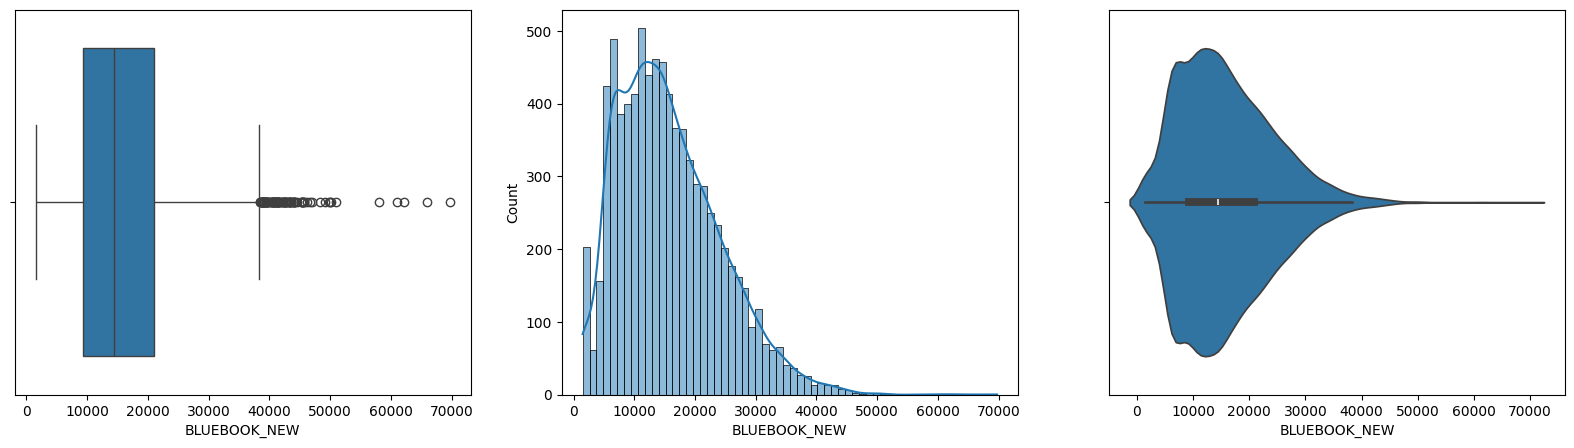

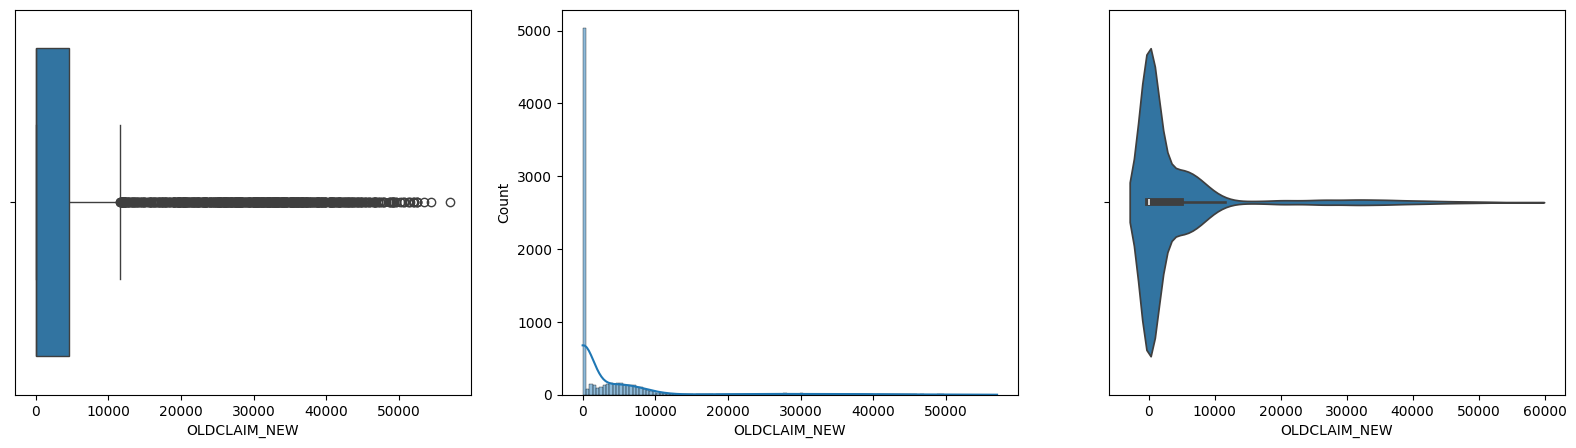

In [806]:
for i in ['AGE','YOJ','TRAVTIME','TIF','CAR_AGE','INCOME_NEW','HOME_VAL_NEW','BLUEBOOK_NEW','OLDCLAIM_NEW']:
    viz(i)

In [807]:
x_train.describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,...,REVOKED,MVR_PTS,CAR_AGE,CLAIM_FLAG,URBANICITY,BIRTH_NEW,INCOME_NEW,HOME_VAL_NEW,BLUEBOOK_NEW,OLDCLAIM_NEW
count,8237.000000,8237.000000,8237.000000,8237.00000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,...,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000
mean,0.169115,44.852373,0.714702,10.51123,0.129295,0.602525,0.461090,1.482336,2.822508,33.530412,...,0.122496,1.696734,8.275586,0.265509,0.202258,158361.820080,61007.041884,154763.802537,15713.841204,4073.388977
std,0.506565,8.663047,1.117086,4.00922,0.335546,0.489405,0.498514,1.292969,2.401850,15.908102,...,0.327878,2.157203,5.540421,0.441631,0.401708,87983.618818,46199.844584,125826.463622,8429.870940,8813.404975
min,0.000000,16.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10145.000000,0.000000,0.000000,1500.000000,0.000000
25%,0.000000,39.000000,0.000000,9.00000,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,80861.000000,29000.000000,0.000000,9290.000000,0.000000
50%,0.000000,45.000000,0.000000,11.00000,0.000000,1.000000,0.000000,1.000000,2.000000,33.000000,...,0.000000,1.000000,8.000000,0.000000,0.000000,160548.000000,53388.000000,160875.500000,14440.000000,0.000000
75%,0.000000,51.000000,1.000000,13.00000,0.000000,1.000000,1.000000,2.000000,5.000000,44.000000,...,0.000000,3.000000,12.000000,1.000000,0.000000,231155.000000,83293.000000,233408.000000,20920.000000,4652.000000
max,4.000000,81.000000,5.000000,23.00000,1.000000,1.000000,1.000000,4.000000,8.000000,142.000000,...,1.000000,13.000000,28.000000,1.000000,1.000000,311272.000000,367030.000000,885282.000000,69740.000000,57037.000000


In [808]:
x_train_copy=x_train.copy()

In [809]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [810]:
for i in ['AGE','TRAVTIME','TIF','CAR_AGE','INCOME_NEW','HOME_VAL_NEW','BLUEBOOK_NEW','OLDCLAIM_NEW']:
    outlier(x_train_copy,i)

In [811]:
def viz1(cl):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(x=x_train_copy[cl])
    plt.subplot(1,3,2)
    sns.histplot(x=x_train_copy[cl],kde=True)
    plt.subplot(1,3,3)
    sns.violinplot(x=x_train_copy[cl])
    plt.show()


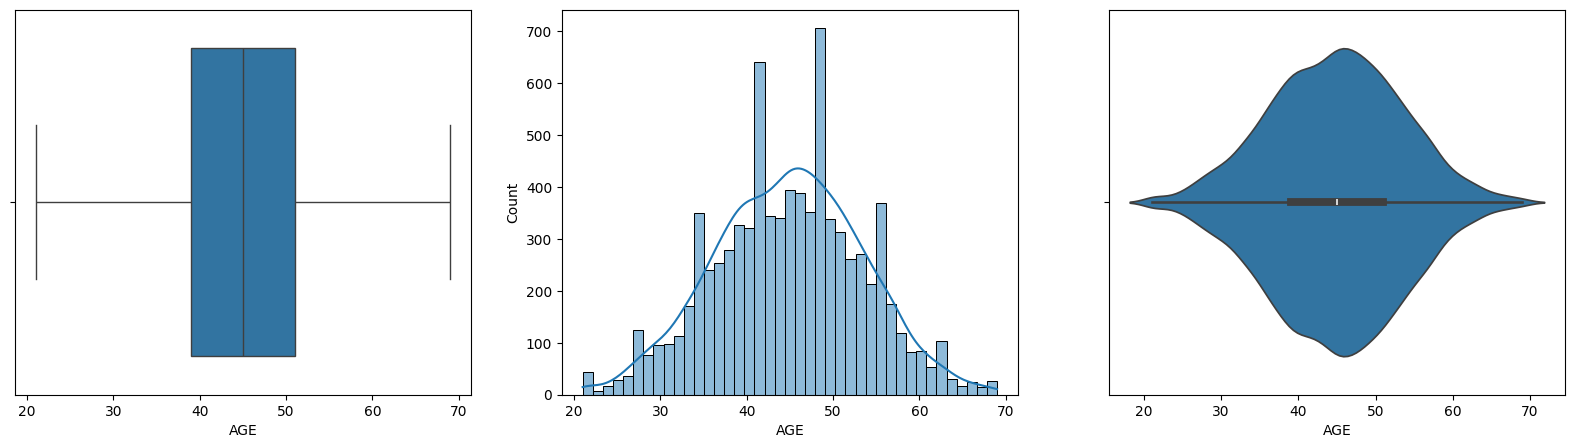

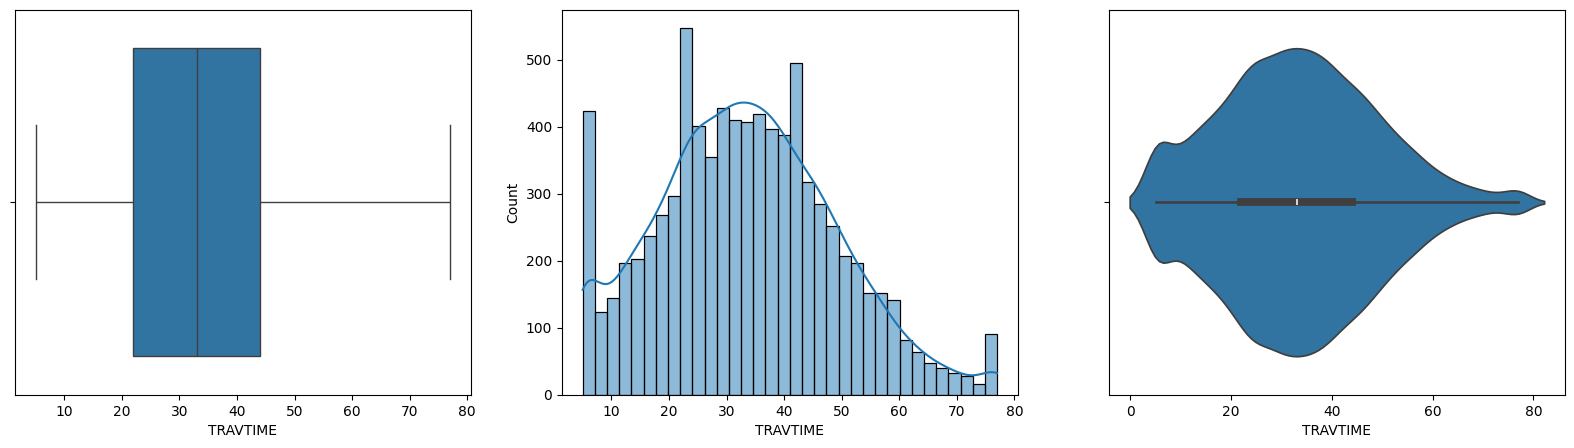

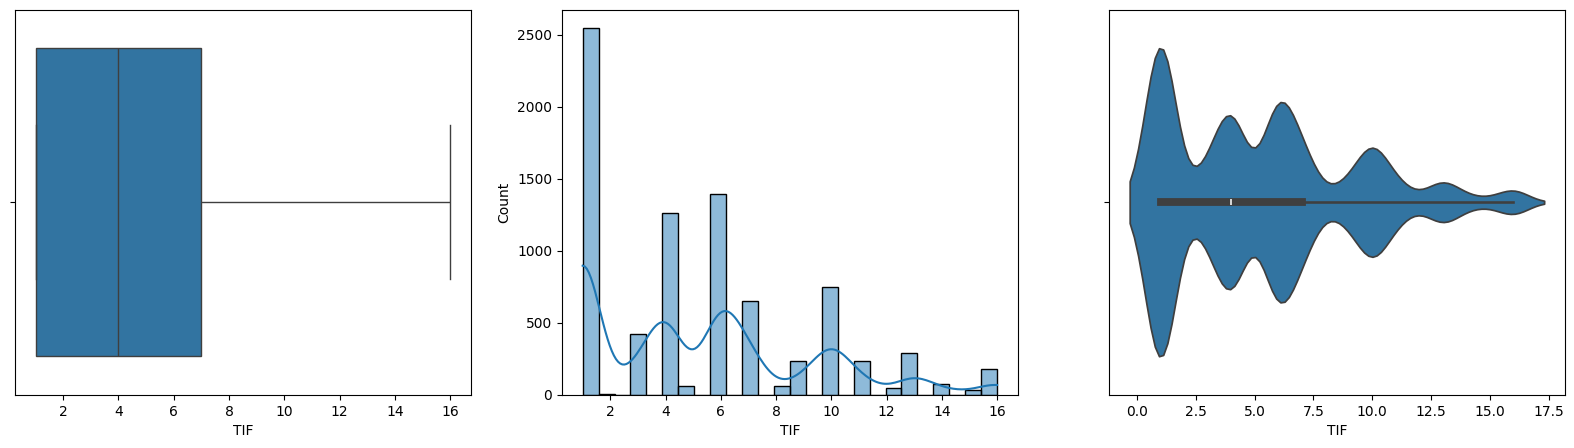

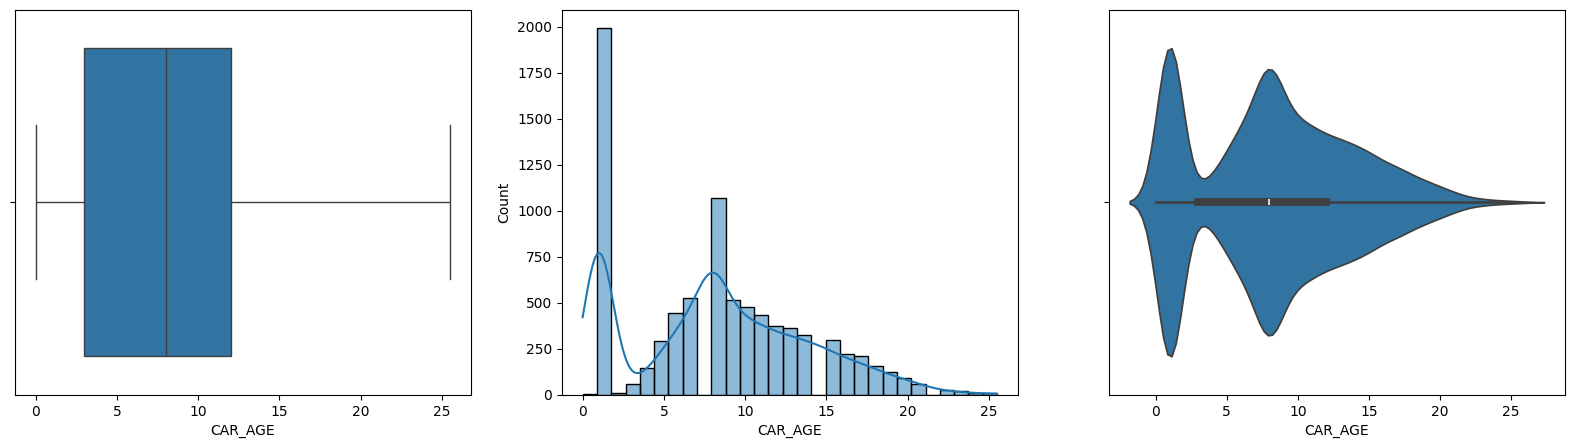

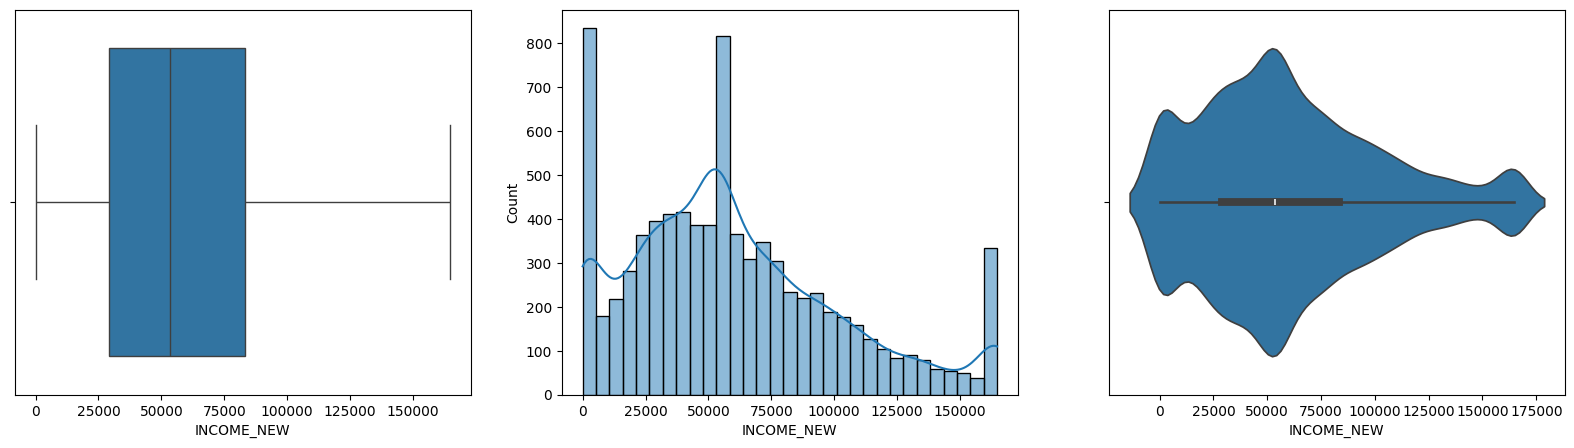

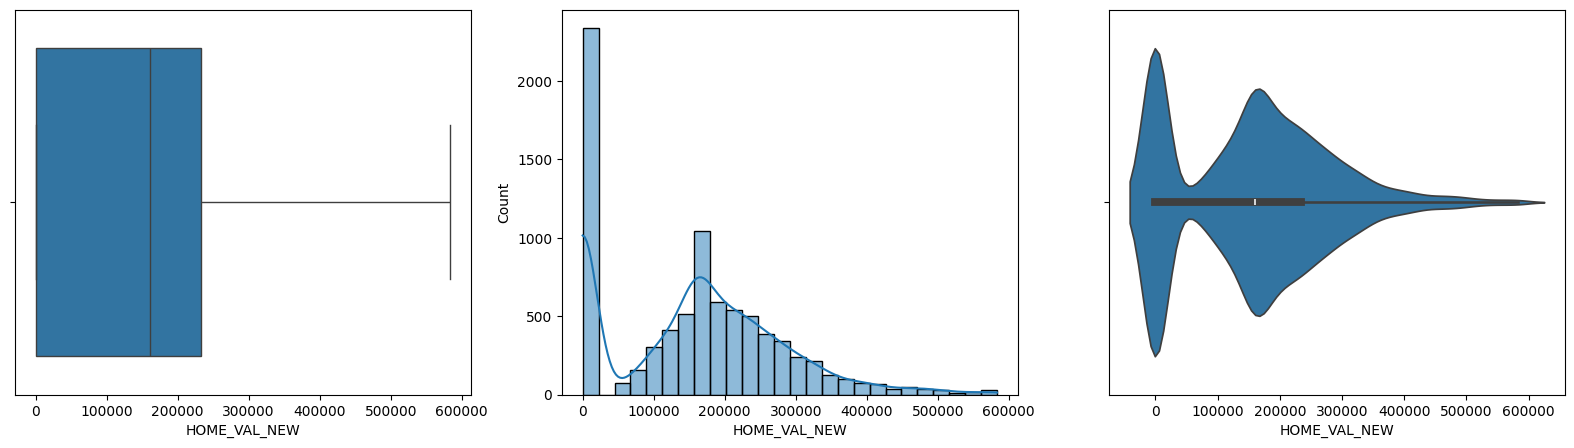

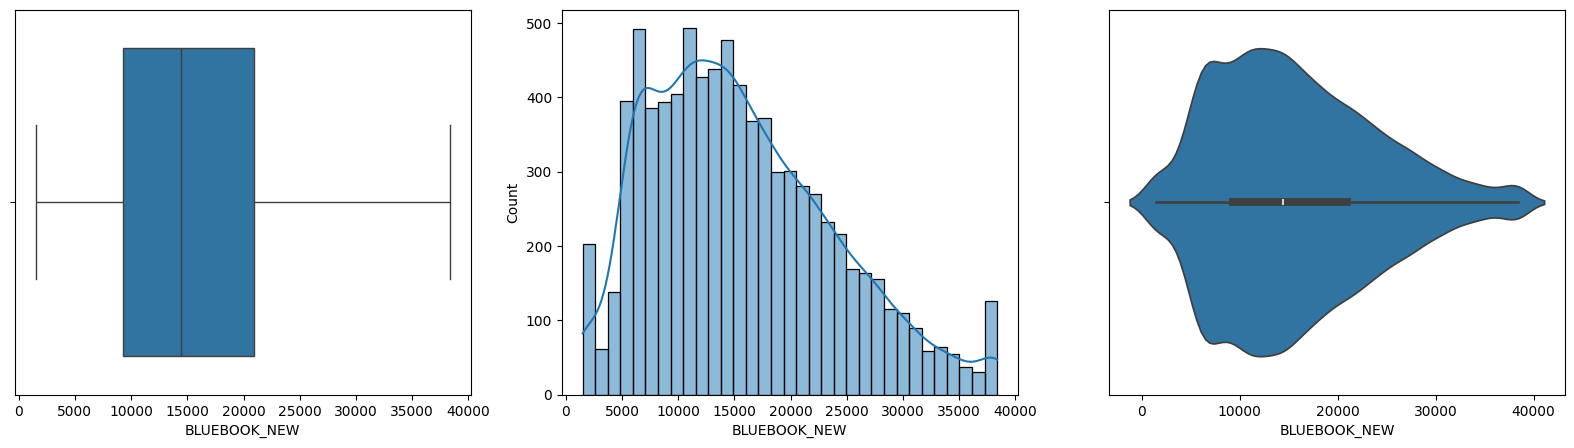

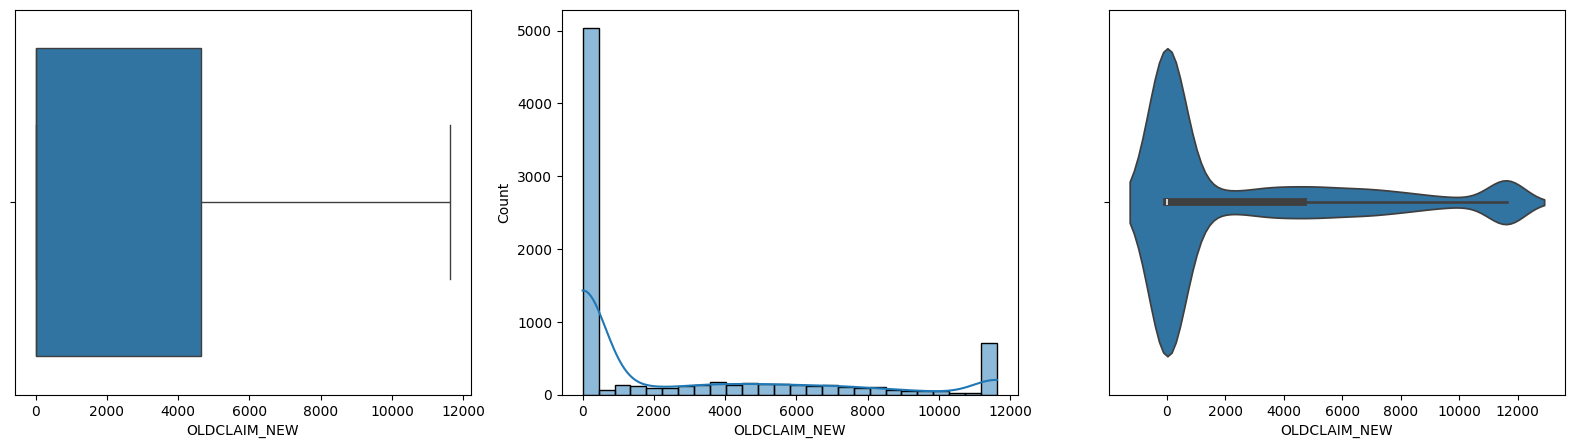

In [812]:
for i in ['AGE','TRAVTIME','TIF','CAR_AGE','INCOME_NEW','HOME_VAL_NEW','BLUEBOOK_NEW','OLDCLAIM_NEW']:
    viz1(i)

In [813]:
x_train_copy.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'PARENT1', 'MSTATUS', 'GENDER',
       'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE', 'TIF', 'CAR_TYPE',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY',
       'BIRTH_NEW', 'INCOME_NEW', 'HOME_VAL_NEW', 'BLUEBOOK_NEW',
       'OLDCLAIM_NEW'],
      dtype='object')

<Axes: >

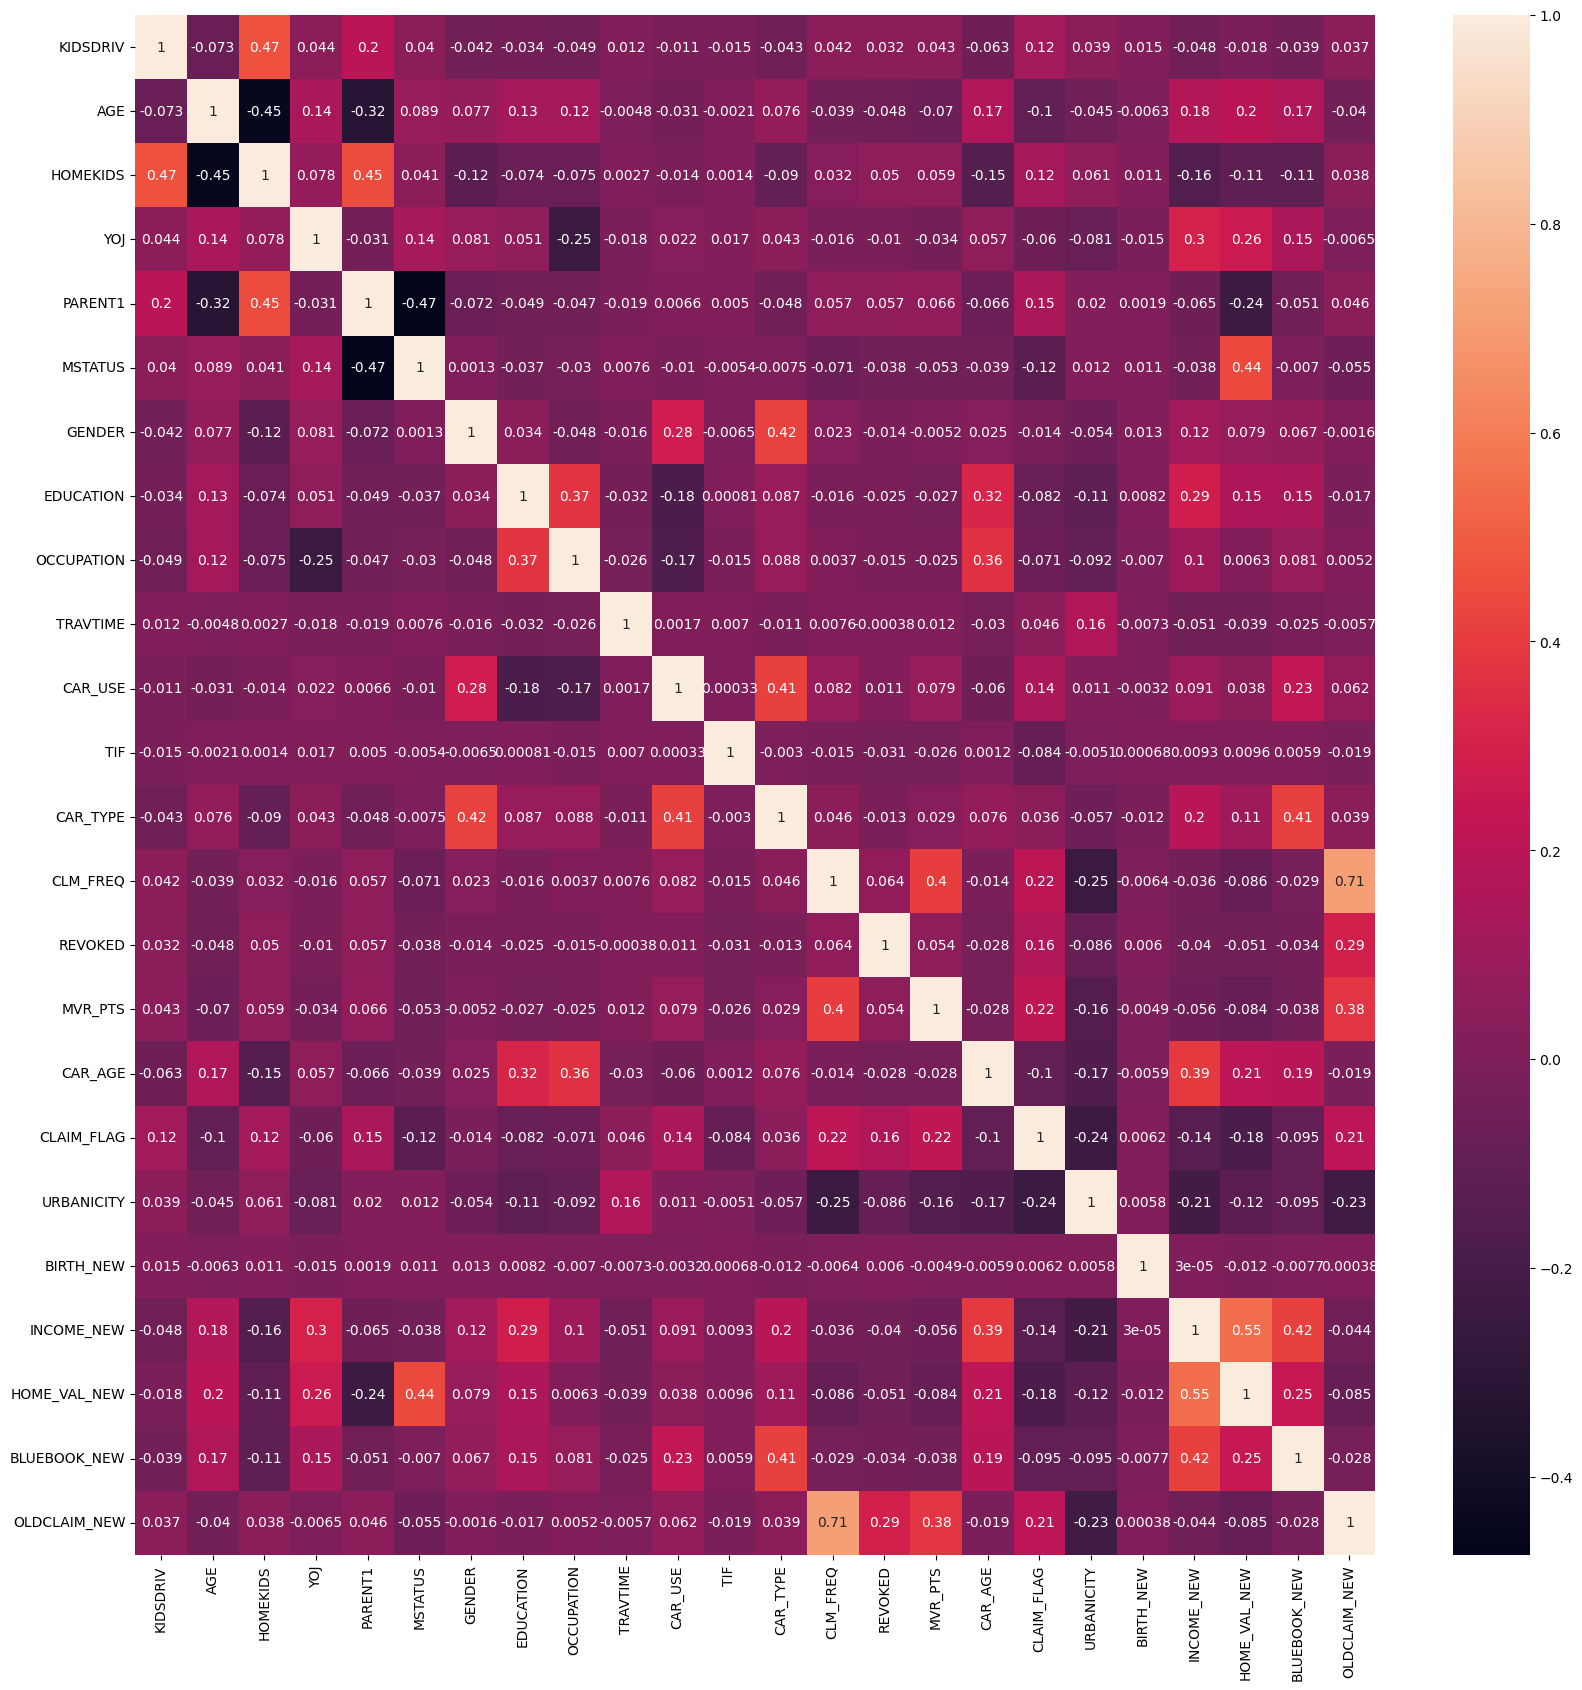

In [814]:
c= ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'PARENT1', 'MSTATUS',
       'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE', 'TIF',
       'CAR_TYPE', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'CLAIM_FLAG',
       'URBANICITY', 'BIRTH_NEW', 'INCOME_NEW', 'HOME_VAL_NEW', 'BLUEBOOK_NEW',
       'OLDCLAIM_NEW']
df_heatmap = x_train_copy[c].corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_heatmap, annot=True)

In [815]:
y_train.shape

(8241,)

In [816]:
null_val=[4554, 1317, 4365, 1651]

In [817]:
y_train.drop(null_val,inplace=True)

In [818]:
y_train.shape

(8237,)

In [819]:
y_train.isnull().sum()

0

In [820]:
y_train.dtype

dtype('O')

In [821]:
yy_train=pd.DataFrame([i.replace('$','').replace(',','') for i in y_train])
yy_train=yy_train.astype('float')

In [ ]:
pip install xgboost

In [826]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [824]:
model_DT=DecisionTreeRegressor()
model_DT.fit(x_train_copy,yy_train)
pred_train=model_DT.predict(x_train_copy)
mse=mean_squared_error(yy_train,pred_train)
mae=mean_absolute_error(yy_train,pred_train)
r2=r2_score(yy_train,pred_train)

In [825]:
mse,mae,r2

(0.0, 0.0, 1.0)

In [831]:
pd.Series(model_DT.feature_importances_,index=x_train_copy.columns).sort_values(ascending=False)

CLAIM_FLAG      0.269843
BIRTH_NEW       0.121617
TRAVTIME        0.099419
BLUEBOOK_NEW    0.086851
CAR_AGE         0.063904
YOJ             0.054064
CLM_FREQ        0.045599
AGE             0.043229
INCOME_NEW      0.038377
OLDCLAIM_NEW    0.035134
TIF             0.024881
MVR_PTS         0.022344
REVOKED         0.017704
URBANICITY      0.015349
HOMEKIDS        0.012579
PARENT1         0.010798
HOME_VAL_NEW    0.009658
CAR_TYPE        0.008726
OCCUPATION      0.007915
MSTATUS         0.006280
EDUCATION       0.002028
CAR_USE         0.001721
KIDSDRIV        0.001321
GENDER          0.000659
dtype: float64

In [827]:
model_Lasso=Lasso()
model_Lasso.fit(x_train_copy,yy_train)
pred_train1=model_Lasso.predict(x_train_copy)
mse=mean_squared_error(yy_train,pred_train1)
mae=mean_absolute_error(yy_train,pred_train1)
r2=r2_score(yy_train,pred_train1)

In [828]:
mse,mae,r2

(17387772.626683503, 1182.0284736929748, 0.27533632831469035)

In [834]:
pd.Series(model_Lasso.coef_,index=x_train_copy.columns).sort_values(ascending=False)

CLAIM_FLAG      5750.333269
PARENT1          135.122308
URBANICITY        77.222815
GENDER            73.903991
EDUCATION         72.473794
CAR_USE           60.027983
MVR_PTS           50.868605
KIDSDRIV          36.368208
HOMEKIDS          28.081737
CLM_FREQ          12.082533
AGE                6.561785
YOJ                1.665693
TRAVTIME           1.128913
BLUEBOOK_NEW       0.035132
BIRTH_NEW          0.000959
HOME_VAL_NEW       0.000524
INCOME_NEW        -0.000732
OLDCLAIM_NEW      -0.009304
TIF               -5.448819
OCCUPATION       -12.269275
CAR_TYPE         -19.819140
CAR_AGE          -20.314954
REVOKED          -84.896212
MSTATUS         -198.259727
dtype: float64

In [835]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [837]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(DecisionTreeRegressor(), x_train_copy, yy_train, scoring='r2', cv=cv, n_jobs=-1)

c:\Users\koush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\koush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\koush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [839]:
scores.mean()

-0.7942789682491498

In [869]:
x_test.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,CLAIM_FLAG,URBANICITY
3100,766201126,0,11JUL50,49.0,0,14.0,"$34,628",No,"$159,544",Yes,...,3,Van,yes,"$7,467",2,No,3,1.0,0,Highly Urban/ Urban
10109,470253509,0,10SEP38,61.0,0,14.0,"$24,546",No,$0,z_No,...,9,z_SUV,no,"$5,890",2,No,0,8.0,1,Highly Urban/ Urban
7445,688694531,0,08NOV46,53.0,0,11.0,"$36,273",No,$0,z_No,...,19,Minivan,yes,"$3,685",2,No,1,1.0,0,Highly Urban/ Urban
7769,115036166,0,11JAN47,52.0,0,7.0,"$66,063",No,"$208,162",z_No,...,11,Pickup,yes,"$7,684",2,No,3,19.0,0,Highly Urban/ Urban
3305,525918644,1,31AUG61,38.0,2,0.0,$0,Yes,$0,z_No,...,4,Sports Car,no,$0,0,No,3,6.0,1,Highly Urban/ Urban


In [870]:
x_test.shape

(2061, 26)

In [871]:
x_test.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             3
HOMEKIDS        0
YOJ           106
INCOME        118
PARENT1         0
HOME_VAL      133
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    130
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CAR_AGE       127
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [872]:
x_test['YOJ'].unique()
x_test['YOJ'].fillna(x_test['YOJ'].median(),inplace=True)

In [868]:
x_test[x_test['AGE'].isnull()].index

Index([295, 3749, 5227], dtype='int64')

In [846]:
x_test.dropna(subset=['AGE'],inplace=True)

In [873]:
lst1=[float(i.replace('$','').replace(',','')) for i in x_test['INCOME'] if i is not np.NaN]
x_test['INCOME'].fillna(str(pd.Series(lst1).median()),inplace=True)

lst2=[float(i.replace('$','').replace(',','')) for i in x_test['HOME_VAL'] if i is not np.NaN]
x_test['HOME_VAL'].fillna(str(pd.Series(lst2).median()),inplace=True)

x_test['OCCUPATION'].fillna('Unknown',inplace=True)

x_test['CAR_AGE'].fillna(x_test['CAR_AGE'].median(),inplace=True)


In [874]:
x_test.isna().sum()

ID            0
KIDSDRIV      0
BIRTH         0
AGE           3
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

In [875]:
x_test.dtypes

ID              int64
KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

In [876]:
months=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
d={'JAN':'01','FEB':'02','MAR':'03','APR':'04','MAY':'05','JUN':'06','JUL':'07','AUG':'08','SEP':'09','OCT':'10','NOV':'11','DEC':'12'}
bdate=[i.replace(m,d[m]) for i in x_test['BIRTH'] for m in months if m in i]
BIRTH_DATE=pd.DataFrame(bdate,columns=['BIRTH_NEW'])

x_test.reset_index(inplace=True)

x_test=pd.concat([x_test,BIRTH_DATE],axis=1)
x_test.shape
x_test['BIRTH_NEW']=x_test['BIRTH_NEW'].astype('int')

In [877]:
lst_income=[i.replace('$','').replace(',','') for i in x_test['INCOME']]
x_test=pd.concat([x_test,pd.DataFrame(lst_income,columns=['INCOME_NEW'])],axis=1)
x_test['INCOME_NEW']=x_test['INCOME_NEW'].astype('float')


In [878]:
x_test['PARENT1']=x_test['PARENT1'].map({'No':0,'Yes':1})

In [879]:
lst_HOME_VAL=[i.replace('$','').replace(',','') for i in x_test['HOME_VAL']]
x_test=pd.concat([x_test,pd.DataFrame(lst_HOME_VAL,columns=['HOME_VAL_NEW'])],axis=1)
x_test['HOME_VAL_NEW']=x_test['HOME_VAL_NEW'].astype('float')

In [880]:
x_test['MSTATUS']=x_test['MSTATUS'].map({'z_No':0,'Yes':1})

In [881]:
x_test['GENDER']=x_test['GENDER'].map({'z_F':0,'M':1})

In [882]:
x_test['EDUCATION']=x_test['EDUCATION'].map({'z_High School':0,'Bachelors':1,'Masters':2,'<High School':3,'PhD':4})
x_test['OCCUPATION']=x_test['OCCUPATION'].map({'z_Blue Collar':0,'Clerical':1,'Professional':2,'Manager':3,'Lawyer':4,'Student':5,
                                                 'Home Maker':6,'Unknown':7,'Doctor':8})
x_test['CAR_USE']=x_test['CAR_USE'].map({'Private':0,'Commercial':1})

In [883]:
lst_BLUEBOOK=[i.replace('$','').replace(',','') for i in x_test['BLUEBOOK']]
x_test=pd.concat([x_test,pd.DataFrame(lst_BLUEBOOK,columns=['BLUEBOOK_NEW'])],axis=1)
x_test['BLUEBOOK_NEW']=x_test['BLUEBOOK_NEW'].astype('float')

In [884]:
x_test['CAR_TYPE']=x_test['CAR_TYPE'].map({'z_SUV':0,'Minivan':1,'Pickup':2,'Sports Car':3,'Van':4,'Panel Truck':5})

In [885]:
lst_OLDCLAIM=[i.replace('$','').replace(',','') for i in x_test['OLDCLAIM']]
x_test=pd.concat([x_test,pd.DataFrame(lst_OLDCLAIM,columns=['OLDCLAIM_NEW'])],axis=1)
x_test['OLDCLAIM_NEW']=x_test['OLDCLAIM_NEW'].astype('float')

In [886]:
x_test['REVOKED']=x_test['REVOKED'].map({'No':0,'Yes':1})
x_test['URBANICITY']=x_test['URBANICITY'].map({'Highly Urban/ Urban':0,'z_Highly Rural/ Rural':1})

In [891]:
x_test[x_test['AGE'].isnull()].index

Index([375, 1568, 1642], dtype='int64')

In [892]:
x_test.dropna(subset=['AGE'],inplace=True)

In [893]:
x_test.drop(['index','ID','RED_CAR','BIRTH','HOME_VAL','BLUEBOOK','OLDCLAIM','INCOME'],axis=1,inplace=True)

In [894]:
y_test.head()

,0
0,0.0
1,1493.0
2,0.0
3,0.0
4,2827.0


In [864]:
yy_test=pd.DataFrame([i.replace('$','').replace(',','') for i in y_test])
yy_test=yy_test.astype('float')

In [897]:
lst=[375, 1568, 1642]

In [898]:
yy_test.reset_index(inplace=True)

In [899]:
yy_test.drop(lst,inplace=True)

In [900]:
yy_test.drop('index',inplace=True,axis=1)

In [901]:
yy_test.shape

(2058, 1)

In [902]:
yy_test.head()

,0
0,0.0
1,1493.0
2,0.0
3,0.0
4,2827.0


In [903]:
pred_test1=model_DT.predict(x_test)
mse=mean_squared_error(yy_test,pred_test1)
mae=mean_absolute_error(yy_test,pred_test1)
r2=r2_score(yy_test,pred_test1)

In [904]:
mse,mae,r2

(22820817.429543246, 1285.8425655976675, -0.4547381917642095)

<Axes: >

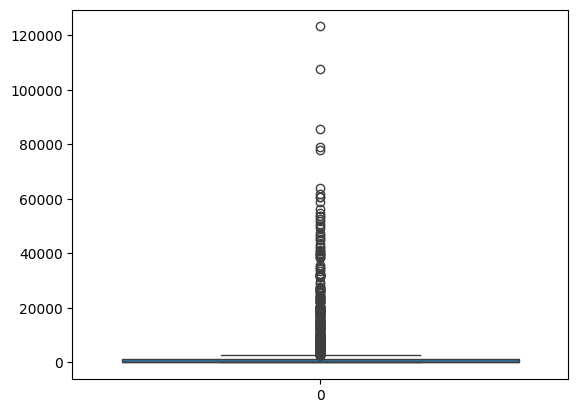

In [905]:
sns.boxplot(yy_train)